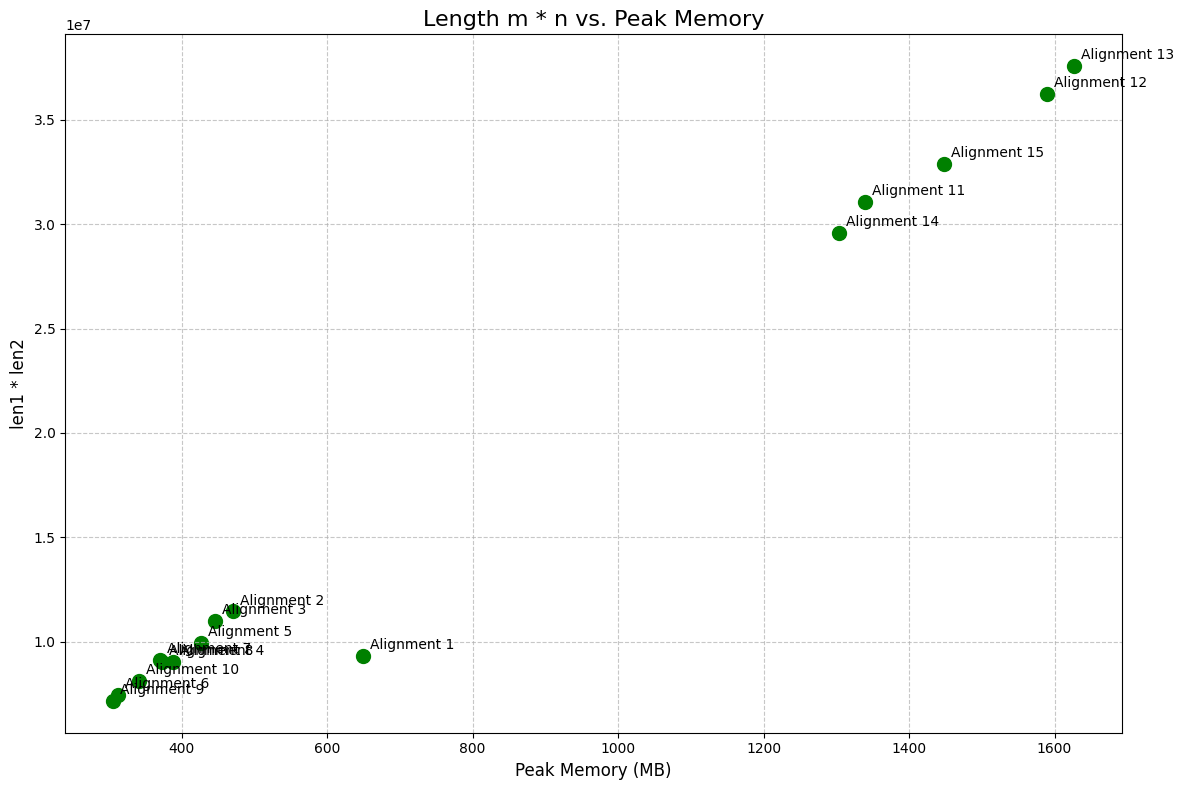

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
df1 = pd.read_csv('results/glo_mut_results.csv')
df2 = pd.read_csv('dataset/mutated_sequences.csv')

# Extract the required lengths
len1_1 = len(df2.iloc[0, 0])
len1_2 = len(df2.iloc[5, 0])
len1_3 = len(df2.iloc[10, 0])

# Calculate y-axis values (len1 * len2)
y_values = []
for i in range(15):
    if i < 5:
        y_values.append(len1_1 * len(df2.iloc[i, 1]))
    elif i < 10:
        y_values.append(len1_2 * len(df2.iloc[i, 1]))
    else:
        y_values.append(len1_3 * len(df2.iloc[i, 1]))

# Extract x-axis values (Peak Memory)
x_values = df1['Peak Memory (MB)'].tolist()[:15]

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(x_values, y_values, color='green', s=100)

# Customize the plot
plt.title('Length m * n vs. Peak Memory', fontsize=16)
plt.xlabel('Peak Memory (MB)', fontsize=12)
plt.ylabel('len1 * len2', fontsize=12)

# Add labels for each point
for i, (x, y) in enumerate(zip(x_values, y_values)):
    plt.annotate(f'Alignment {i+1}', (x, y), xytext=(5, 5), 
                 textcoords='offset points')

# Improve layout
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()
